Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5847 - loss: 1.0228 - val_accuracy: 0.6333 - val_loss: 0.9192
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6784 - loss: 0.8614 - val_accuracy: 0.8333 - val_loss: 0.7949
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7841 - loss: 0.7585 - val_accuracy: 0.9000 - val_loss: 0.6910
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7707 - loss: 0.7062 - val_accuracy: 0.9000 - val_loss: 0.5968
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7854 - loss: 0.6167 - val_accuracy: 0.9000 - val_loss: 0.5113
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8260 - loss: 0.5054 - val_accuracy: 0.9000 - val_loss: 0.4430
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8649 - loss: 0.4608 - val_accuracy: 0.8667 - val_loss: 0.3932
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7987 - loss: 0.4561 - val_accuracy: 0.9000 - val_loss: 0.3553


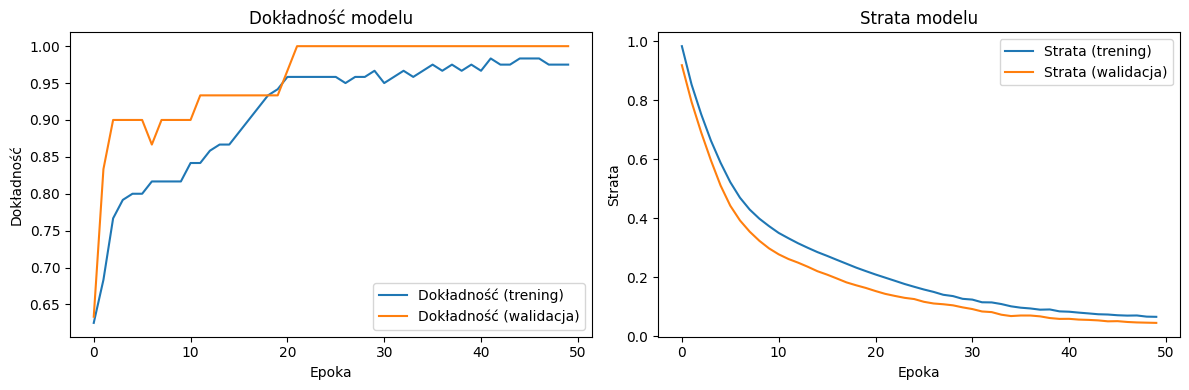

In [6]:
# Importowanie potrzebnych bibliotek
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pobieranie danych z GitHub
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
iris_df = pd.read_csv(url)

# Oddzielenie cech i etykiet
X = iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
# Mapowanie nazw klas na liczby (Setosa: 0, Versicolor: 1, Virginica: 2)
y = iris_df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}).values

# Przekształcenie etykiet na format one-hot encoded dla klasyfikacji wieloklasowej
y_one_hot = tf.keras.utils.to_categorical(y)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Skalowanie cech (standardizacja)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definicja modelu z warstwą Input
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Jawna warstwa Input określająca kształt danych
    Dense(64, activation='relu'),      # Pierwsza warstwa ukryta
    Dense(32, activation='relu'),      # Druga warstwa ukryta
    Dense(3, activation='softmax')     # Warstwa wyjściowa z Softmax dla 3 klas
])

# Kompilacja modelu
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Funkcja straty dla klasyfikacji wieloklasowej
    metrics=['accuracy']
)

# Wyświetlenie podsumowania modelu
model.summary()

# Trenowanie modelu
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# Ewaluacja modelu na danych testowych
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nDokładność na zbiorze testowym: {test_accuracy:.4f}")

# Wizualizacja wyników treningu
plt.figure(figsize=(12, 4))

# Wykres dokładności
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.title('Dokładność modelu')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

# Wykres straty
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Strata (trening)')
plt.plot(history.history['val_loss'], label='Strata (walidacja)')
plt.title('Strata modelu')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

plt.tight_layout()
plt.show()